In [2]:
import numpy as np
import scipy.stats as sc
#from scipy import signal
from scipy import io as sio
from matplotlib import pyplot as plt
import pywt
from collections import Counter
from ordpy import tsallis_entropy,renyi_entropy
plt.rc('xtick', labelsize=20) 
plt.rc('ytick', labelsize=20) 

In [3]:
### Data extraction
dataset1=np.load('standing_dataset.npz')
data1=dataset1['data']; labels1=dataset1['labels']

In [4]:
data1.shape

(40, 200, 1280)

In [5]:
dataset3=np.load('standing_dataset3.npz')
data3=dataset3['data']; labels3=dataset3['labels']

In [6]:
labels1

array([15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15,
       15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15,
       15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15,
       15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15,
       15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15])

In [7]:
dataset5=np.load('standing_dataset5.npz')
data5=dataset5['data']; labels5=dataset5['labels']

In [8]:
labels5

array([5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5])

In [9]:
dataset9=np.load('standing_dataset09.npz')
data9=dataset9['data']; labels9=dataset9['labels']

In [10]:
labels9

array([9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9,
       9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9])

In [11]:
# Extraction of one file in each dataset 

In [12]:
data1[22][199] #signal take in recording 25 and reflected signal 39 in dataset (9persons) in queue

array([34.051758, 54.787109, 72.600586, ..., 53.653809, 53.341309,
       53.652344])

Text(0.5, 1.0, 'Signal taken in folder 1 recording 22 and signal number  199')

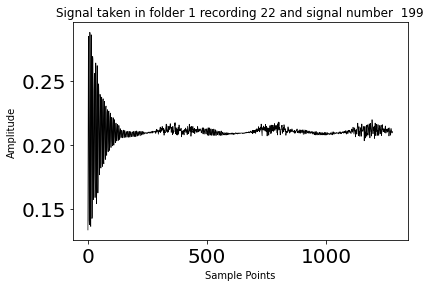

In [13]:
plt.plot(data1[22][199]/255, color='k', linewidth='0.7')
plt.xlabel("Sample Points")
plt.ylabel("Amplitude")
plt.title("Signal taken in folder 1 recording 22 and signal number  199")

In [14]:
data3[28][180] #signal take in recording 28 and reflected signal 180 in dataset (3 persons) 

array([50.833984, 44.279785, 50.575195, ..., 54.063477, 53.758301,
       53.603516])

Text(0.5, 1.0, 'Signal taken in folder 3 recording 28 and signal number  180')

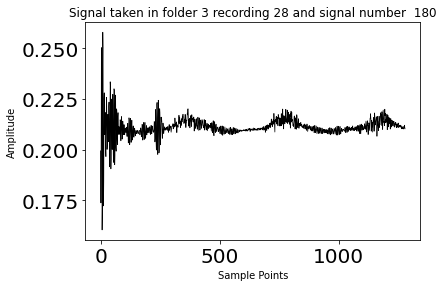

In [15]:
plt.plot(data3[28][180]/255,color='k',linewidth=0.7)
plt.xlabel("Sample Points")
plt.ylabel("Amplitude")
plt.title("Signal taken in folder 3 recording 28 and signal number  180")

In [16]:
data5[25][150] #signal take in recording 25 and reflected signal 29 in dataset in dataset(5 persons)

array([51.408691, 44.220703, 50.156738, ..., 53.949219, 53.664063,
       53.508789])

Text(0.5, 1.0, 'Signal taken in folder 5 recording 2 and signal number  150')

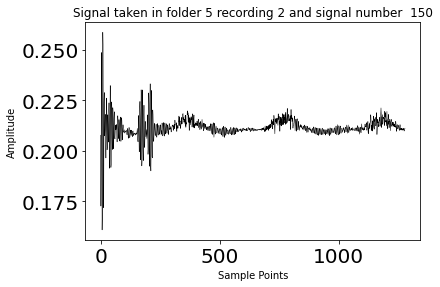

In [17]:
plt.plot(data5[2][150]/255, color='k',linewidth=0.5)
plt.xlabel("Sample Points")
plt.ylabel("Amplitude")
plt.title("Signal taken in folder 5 recording 2 and signal number  150")

In [18]:
data9[25][49] #signal take in recording 15 and reflected signal 49 in dataset in dataset(5 persons)

array([47.637207, 43.72998 , 53.719238, ..., 54.026367, 53.533691,
       53.441406])

Text(0.5, 1.0, 'Signal taken in folder 9 recording 25 and signal number  39')

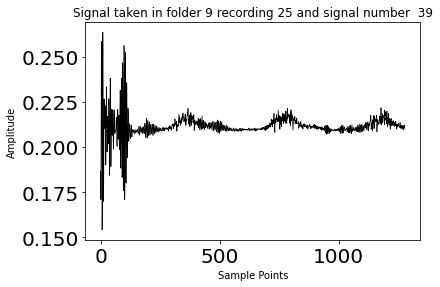

In [19]:
plt.plot(data9[25][39]/255, color='k', linewidth=0.7)
plt.xlabel("Sample Points")
plt.ylabel("Amplitude")
plt.title("Signal taken in folder 9 recording 25 and signal number  39")

In [20]:
# Decomposition of wavelet of the signal using 

In [21]:
#signal contains 9 persons
dat=data9[25][39]/255
coeff=pywt.wavedec(dat,"bior3.5", level=1)
coeff2=pywt.wavedec(dat,"bior3.5", level=2)

In [22]:
import pandas as pd 

In [23]:
dat=data9[25][39]/255

In [24]:
def statistic_prop(signals,waveletname,lev,n):
    feature_mean=[]; feature_variance=[];feature_std=[];feature_max=[];feature_min=[];feature_median=[];feature_quartile=[];feature_third_quartile=[]; feature_energ=[]
    coeff=pywt.wavedec(signals,waveletname,level=lev)
    feature_mean.append(np.mean(coeff[0]))
    feature_variance.append(np.var(coeff[0]))
    feature_std.append(np.std(coeff[0]))
    feature_min.append(np.min(coeff[0]))
    feature_max.append(np.max(coeff[0]))
    #feature_rms.append(np.mean(np.sqrt(coeff[0]**2)))
    feature_median.append(np.percentile(coeff[0], 50))
    feature_quartile.append(np.percentile(coeff[0], 25))
    feature_third_quartile.append(np.percentile(coeff[0], 75))
    feature_energ.append(sum(coeff[0]**2 + coeff[1]**2))
    labels=[]
    labels.append(n)
    return pd.DataFrame(np.column_stack([feature_mean,feature_variance, feature_std, feature_min, feature_max,feature_median,feature_quartile, feature_third_quartile, feature_energ, labels]), 
                               columns=['Mean','Variance', 'Std', 'MIN','MAX','Median', 'Quartile','Third_quartile', 'Energy','number of people'])

In [25]:
dat=data9[25][39]/255

In [26]:
statistic_prop(dat,"bior3.5",2,9)

,Mean,Variance,Std,MIN,MAX,Median,Quartile,Third_quartile,Energy,number of people
0,0.423451,0.000451,0.021226,0.269375,0.661736,0.421854,0.419286,0.426788,59.031552,9.0


In [26]:
def entrop_f(signals,waveletname,lev,n):
    feature_shannon=[]; feature_renyi=[] ; feature_tsallis=[]
    coeff=pywt.wavedec(signals,waveletname,level=lev)
    feature_shannon.append(renyi_entropy(coeff[0],alpha=1))
    feature_renyi.append(renyi_entropy(coeff[0],alpha=3))
    feature_tsallis.append(tsallis_entropy(coeff[0],q=3))
    labels=[]
    labels.append(n)
    return pd.DataFrame(np.column_stack([feature_shannon, feature_renyi, feature_tsallis,labels]), 
                               columns=['Shannon', 'Renyi', 'tsallis','number of people'])

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=0)
clf = SVC(random_state=0)
clf.fit(X_train, y_train)
SVC(random_state=0)
predictions = clf.predict(X_test)
cm = confusion_matrix(y_test, predictions, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=clf.classes_)
disp.plot()
plt.show()

Text(0, 0.5, 'Amplitude')

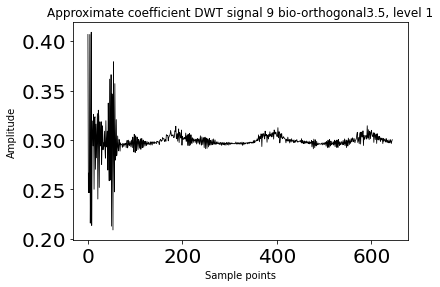

In [203]:
plt.plot(coeff[0],'k',linewidth=0.8)
plt.title('Approximate coefficient DWT signal 9 bio-orthogonal3.5, level 1')
plt.xlabel('Sample points')
plt.ylabel('Amplitude')

Text(0, 0.5, 'Amplitude')

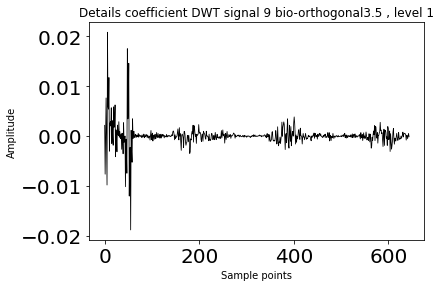

In [204]:
plt.plot(coeff[1],'k',linewidth=0.8)
plt.title('Details coefficient DWT signal 9 bio-orthogonal3.5 , level 1')
plt.xlabel('Sample points')
plt.ylabel('Amplitude')


Text(0, 0.5, 'Amplitude')

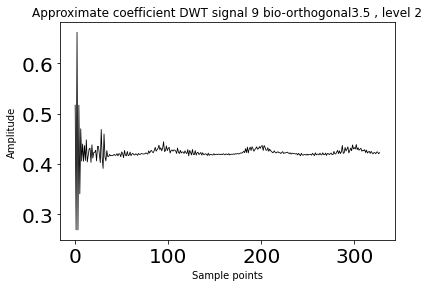

In [205]:
plt.plot(coeff2[0],'k',linewidth=0.8)
plt.title('Approximate coefficient DWT signal 9 bio-orthogonal3.5 , level 2')
plt.xlabel('Sample points')
plt.ylabel('Amplitude')

Text(0, 0.5, 'Amplitude')

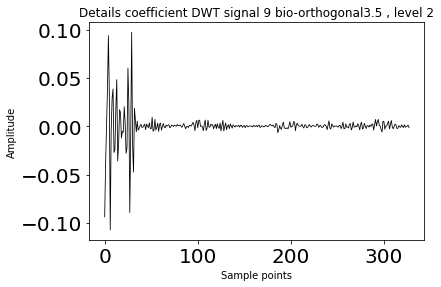

In [206]:
plt.plot(coeff2[1],'k',linewidth=0.8)
plt.title('Details coefficient DWT signal 9 bio-orthogonal3.5 , level 2')
plt.xlabel('Sample points')
plt.ylabel('Amplitude')

Text(193.86818181818177, 0.5, 'Amplitude')

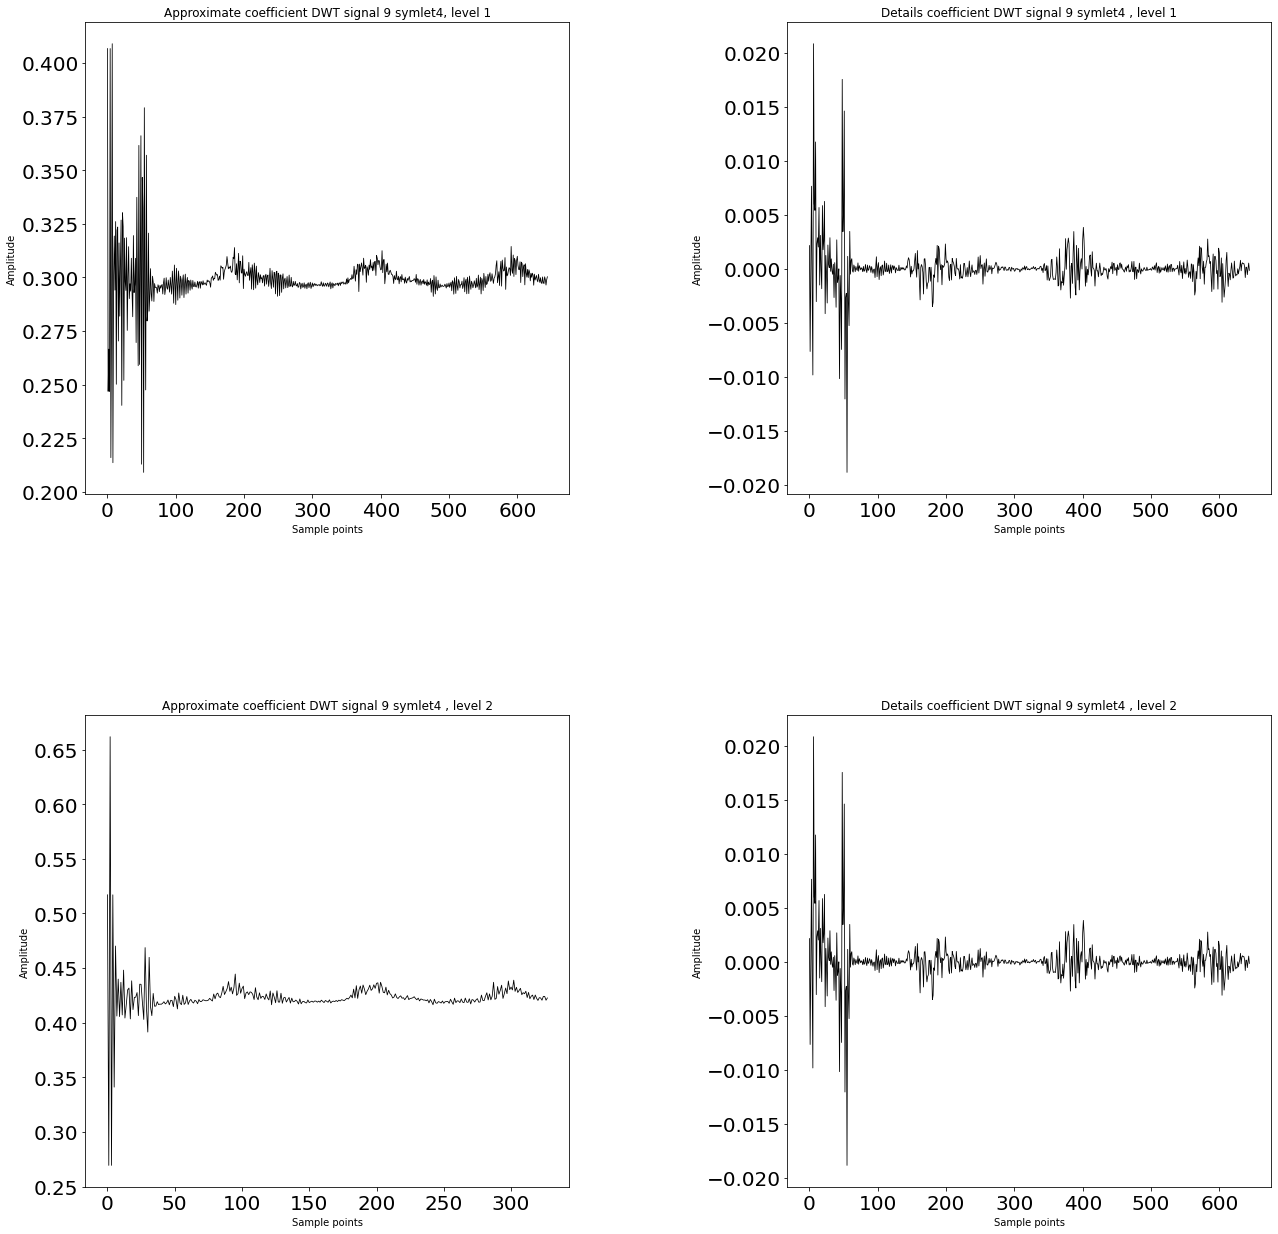

In [207]:
# Create four polar axes and access them through the returned array
fig, axs = plt.subplots(2, 2)
fig.tight_layout()
fig.set_figheight(20)
fig.set_figwidth(20)
axs[0][0].plot(coeff[0],'k',linewidth=0.8)
axs[0][0].set_title('Approximate coefficient DWT signal 9 symlet4, level 1')
axs[0][0].set_xlabel('Sample points')
axs[0][0].set_ylabel('Amplitude')

axs[0][1].plot(coeff[1],'k',linewidth=0.8)
axs[0][1].set_title('Details coefficient DWT signal 9 symlet4 , level 1')
axs[0][1].set_xlabel('Sample points')
axs[0][1].set_ylabel('Amplitude')

axs[1][0].plot(coeff2[0],'k',linewidth=0.8)
axs[1][0].set_title('Approximate coefficient DWT signal 9 symlet4 , level 2')
axs[1][0].set_xlabel('Sample points')
axs[1][0].set_ylabel('Amplitude')

axs[1][1].plot(coeff2[2],'k',linewidth=0.8)
axs[1][1].set_title('Details coefficient DWT signal 9 symlet4 , level 2')
axs[1][1].set_xlabel('Sample points')
axs[1][1].set_ylabel('Amplitude')



In [21]:
mec=np.mean(cA1);ec=np.std(cA1);vrc=np.var(cA1);listc=[mec,ec,vrc]

In [22]:
listc #list contain the mean , the standard deviation and variance 

[0.4231947476593138, 0.007005274102278623, 4.907386524805556e-05]

In [23]:
mec1=np.std(dat9);ec1=np.std(dat9);vrc1=np.var(dat9); list1=[mec1,ec1,vrc1]

In [24]:
list1 #list contain contain the same to listc but he is compute using data

[0.006849331775095818, 0.006849331775095818, 4.6913345765337236e-05]

In [25]:
tsallis_entropy(cA1,q=3) #Tsallis entropy

0.9990170217216705

In [26]:
renyi_entropy(cA1,alpha=1) #Entropy of shannon

0.9968985793580188

In [27]:
renyi_entropy(cA1,alpha=3) #Renyi Entropy

0.9905607734205536

In [28]:
# Now for the data contains 3 persons

In [29]:
dat3=data3[28][180]/255

In [30]:
cA1,cD1,cD2=pywt.wavedec(dat3,"haar",level=2)

In [31]:
mec=np.mean(cA1);ec=np.std(cA1);vrc=np.var(cA1);listc=[mec,ec,vrc]

In [32]:
listc

[0.4223270941911765, 0.005672631802811979, 3.217875157027389e-05]

In [33]:
tsallis_entropy(cA1,q=3) #Tsallis entropy

0.9995150359021205

In [34]:
renyi_entropy(cA1,alpha=1) #Entropy of shannon

0.9983960501680514

In [35]:
renyi_entropy(cA1,alpha=3) #Renyi Entropy

0.9953031365681502

In [36]:
#Now data contains 5 persons

In [37]:
dat5=data5[25][150]/255

In [38]:
cA1,cD1,cD2=pywt.wavedec(dat5,"haar",level=2)

In [39]:
mec=np.mean(cA1);ec=np.std(cA1);vrc=np.var(cA1);listc=[mec,ec,vrc]

In [40]:
listc #list contain the mean , the standard deviation and variance 

[0.4221387018321079, 0.005589661820189427, 3.124431926408338e-05]

In [463]:
mec1=np.mean(dat5);ec1=np.std(dat5);vrc1=np.var(dat5); list1=[mec1,ec1,vrc1]

In [464]:
list1 #list contain contain the same to listc but he is compute using data

[0.21106935091605394, 0.004846061114645159, 2.3484308326875886e-05]

In [38]:
tsallis_entropy(cA1,q=3) #Tsallis entropy

0.9996065783930935

In [39]:
renyi_entropy(cA1,alpha=1) #Entropy of shannon

0.9986958543908536

In [40]:
renyi_entropy(cA1,alpha=3) #Renyi Entropy

0.9961836912904967

In [468]:
#Now the file contain 1 person

In [173]:
dat1=data1[15][49]/255 #signal take in recording 15 and reflected signal 49 in dataset in dataset(5 persons)

In [174]:
dat5=data5[25][150]/255

In [175]:
dat3=data3[28][180]/255

In [176]:
dat9=data9[25][39]/255

In [401]:
cA1=pywt.wavedec(dat1,"haar",level=6)

In [402]:
t=tsallis_entropy(cA1[0],q=3) ; s=renyi_entropy(cA1[0],alpha=1) ; r=renyi_entropy(cA1[0],alpha=3); entrop=[]

In [403]:
mec=np.mean(cA1[0]);ec=np.std(cA1[0]);vrc=np.var(cA1[0]); quarti = np.percentile(cA1[0],25) ; medi= np.percentile(cA1[0],50) ; third_quart=np.percentile(cA1[0],75)

In [404]:
listc=[mec,ec,vrc,quarti,medi,third_quart]

In [405]:
listc #list contain the mean , the standard deviation and variance 

[1.6840597127450991,
 0.009144326009174102,
 8.361869816205795e-05,
 1.6772526780637265,
 1.6856226311274518,
 1.6889300202205888]

In [400]:
entrop=[s,r,t]
entrop

[0.855321350267145, 0.6934264036172708, 0.942857142857143]

In [45]:
mec1=np.mean(dat5);ec1=np.std(dat5);vrc1=np.var(dat5); list1=[mec1,ec1,vrc1]

In [46]:
list1 #list contain contain the same to listc but he is compute using data

[0.21106935091605394, 0.004846061114645159, 2.3484308326875886e-05]

In [47]:
tsallis_entropy(cA1,q=3) #Tsallis entropy

0.9973024711674738

In [48]:
renyi_entropy(cA1,alpha=1) #Entropy of shannon

0.9910028587405351

In [49]:
renyi_entropy(cA1,alpha=3) #Renyi Entropy

0.9748240170525484

In [68]:
feature_mean=[]; feature_variance=[];feature_std=[]; feature_rms=[];feature_max=[];feature_min=[]

In [69]:
# Features Base on statistics property

In [75]:
for i in range(200):
    for j in range(40):
        coeff=pywt.wavedec(data9[j][i]/255,"haar",level=1)
        feature_mean.append(np.mean(coeff[0]))
        feature_variance.append(np.var(coeff))
        feature_std.append(np.std(coeff))
        feature_min.append(np.min(coeff))
        feature_max.append(np.max(coeff))
        feature_rms.append(np.mean(np.sqrt(coeff[0] +coeff[1]**2)))

In [71]:
len(feature_rms)

8000

In [72]:
labels9=[]
for j in range(8000):
    labels9.append(9)

In [73]:
df_features_stat = pd.DataFrame(np.column_stack([feature_mean,feature_variance, feature_std, feature_min, feature_max, feature_rms, labels9]), 
                               columns=['Mean','Variance', 'Std', 'MIN','MAX','RMS','number of people'])

In [74]:
df_features_stat

,Mean,Variance,Std,MIN,MAX,RMS,number of people
0,-0.000052,0.022576,0.150253,-0.046473,0.351223,0.547912,9.0
1,0.000031,0.022507,0.150025,-0.033615,0.355090,0.547563,9.0
2,0.000081,0.022573,0.150245,-0.031784,0.364262,0.547920,9.0
3,0.000028,0.022493,0.149977,-0.031899,0.354090,0.547480,9.0
4,0.000047,0.022454,0.149848,-0.030516,0.345737,0.547254,9.0
...,...,...,...,...,...,...,...
7995,-0.000039,0.022339,0.149462,-0.039199,0.354930,0.546425,9.0
7996,0.000024,0.022376,0.149585,-0.046348,0.368913,0.546619,9.0
7997,-0.000023,0.022317,0.149390,-0.041613,0.346087,0.546359,9.0
7998,0.000107,0.022384,0.149612,-0.035827,0.373104,0.546781,9.0


In [34]:
feature_std[7999]

0.006563647260025353

In [35]:
#Features Based on Entropy

In [36]:
feature_shannon=[]; feature_renyi=[] ; feature_tsallis=[]

In [37]:
for i in range(200):
    for j in range(40):
        cA1,cD1,cD2=pywt.wavedec(data9[j][i]/255,"haar",level=2)
        feature_shannon.append(renyi_entropy(cA1,alpha=1))
        feature_renyi.append(renyi_entropy(cA1,alpha=3))
        feature_tsallis.append(tsallis_entropy(cA1,q=3))

In [38]:
feature_shannon[7999]

0.9952291759635706

In [39]:
import pandas as pd

In [42]:
labels9=[]
for j in range(8000):
    labels9.append(9)

In [43]:
df_features = pd.DataFrame(np.column_stack([feature_shannon, feature_renyi, feature_tsallis,labels9]), 
                               columns=['Shannon', 'Renyi', 'tsallis','number of people'])

In [44]:
df_features

,Shannon,Renyi,tsallis,number of people
0,0.998758,0.996393,0.999628,9.0
1,0.996840,0.990724,0.999034,9.0
2,0.998917,0.996707,0.999661,9.0
3,0.997523,0.992213,0.999191,9.0
4,0.997431,0.992676,0.999240,9.0
...,...,...,...,...
7995,0.998385,0.995336,0.999518,9.0
7996,0.995475,0.986981,0.998635,9.0
7997,0.999039,0.997134,0.999705,9.0
7998,0.994603,0.985081,0.998431,9.0


In [64]:
labels1=[]
for j in range(8000):
    labels1.append(1)

In [65]:
# Features Base on statistics property dataset 1

In [66]:
feature1_mean=[]; feature1_variance=[];feature1_std=[]; feature1_rms=[];feature1_max=[];feature1_min=[]

In [67]:
# Features Base on statistics property folder 1

In [68]:
for i in range(200):
    for j in range(40):
        cA1,cD1,cD2=pywt.wavedec(data1[j][i]/255,"haar",level=2)
        feature1_mean.append(np.mean(cA1))
        feature1_variance.append(np.var(cA1))
        feature1_std.append(np.std(cA1))
        feature1_min.append(np.min(cA1))
        feature1_max.append(np.max(cA1))
        feature1_rms.append(np.mean(np.sqrt(cA1**2)))

In [69]:
len(feature1_variance)

8000

In [78]:
df_features_stat1 = pd.DataFrame(np.column_stack([feature1_mean,feature1_variance, feature1_std, feature1_min, feature1_max, feature1_rms, labels1]), 
                               columns=['Mean','Variance', 'Std', 'MIN','MAX','RMS','number of people'])

In [79]:
df_features_stat1

,Mean,Variance,Std,MIN,MAX,RMS,number of people
0,0.424986,0.000043,0.006578,0.390326,0.473599,0.424986,1.0
1,0.424097,0.000040,0.006342,0.394390,0.473582,0.424097,1.0
2,0.422475,0.000098,0.009880,0.375460,0.512904,0.422475,1.0
3,0.422282,0.000104,0.010174,0.341953,0.484909,0.422282,1.0
4,0.422336,0.000104,0.010184,0.342101,0.485229,0.422336,1.0
...,...,...,...,...,...,...,...
7995,0.423117,0.000034,0.005864,0.390300,0.471002,0.423117,1.0
7996,0.422861,0.000033,0.005741,0.390479,0.471205,0.422861,1.0
7997,0.422708,0.000032,0.005699,0.391208,0.471348,0.422708,1.0
7998,0.422702,0.000033,0.005716,0.392789,0.470897,0.422702,1.0


In [490]:
# Features Base on entropy property folder 1

In [130]:
feature1_shannon=[]; feature1_renyi=[] ; feature1_tsallis=[]

In [131]:
for i in range(200):
    for j in range(40):
        cA1,cD1,cD2=pywt.wavedec(data1[j][i]/255,"haar",level=2)
        feature1_shannon.append(renyi_entropy(cA1,alpha=1))
        feature1_renyi.append(renyi_entropy(cA1,alpha=3))
        feature1_tsallis.append(tsallis_entropy(cA1,q=3))

In [132]:
len(feature_shannon)

8000

In [139]:
df_features1 = pd.DataFrame(np.column_stack([feature1_shannon, feature1_renyi, feature1_tsallis,labels1]), 
                               columns=['Shannon', 'Renyi', 'tsallis','number of people'])

In [140]:
df_features1

,Shannon,Renyi,tsallis,number of people
0,0.998052,0.994172,0.999397,1.0
1,0.999603,0.998809,0.999878,1.0
2,0.991646,0.976447,0.997484,1.0
3,0.998044,0.994389,0.999420,1.0
4,0.996440,0.989772,0.998933,1.0
...,...,...,...,...
7995,0.995207,0.986069,0.998537,1.0
7996,0.998280,0.995062,0.999490,1.0
7997,0.997735,0.993155,0.999290,1.0
7998,0.999597,0.998827,0.999880,1.0


In [494]:
# Features Base on statistics property folder 3

In [80]:
feature3_mean=[]; feature3_variance=[];feature3_std=[]; feature3_rms=[];feature3_max=[];feature3_min=[]

In [81]:
for i in range(200):
    for j in range(40):
        cA1,cD1,cD2=pywt.wavedec(data3[j][i]/255,"haar",level=2)
        feature3_mean.append(np.mean(cA1))
        feature3_variance.append(np.var(cA1))
        feature3_std.append(np.std(cA1))
        feature3_min.append(np.min(cA1))
        feature3_max.append(np.max(cA1))
        feature3_rms.append(np.mean(np.sqrt(cA1**2)))

In [497]:
len(feature3_mean)

8000

In [498]:
# Features Base on entropy property folder 3

In [136]:
feature3_shannon=[]; feature3_renyi=[] ; feature3_tsallis=[]

In [137]:
for i in range(200):
    for j in range(40):
        cA1,cD1,cD2=pywt.wavedec(data3[j][i]/255,"haar",level=2)
        feature3_shannon.append(renyi_entropy(cA1,alpha=1))
        feature3_renyi.append(renyi_entropy(cA1,alpha=3))
        feature3_tsallis.append(tsallis_entropy(cA1,q=3))

In [138]:
len(feature3_shannon)

8000

In [141]:
df_features3 = pd.DataFrame(np.column_stack([feature3_shannon, feature3_renyi, feature3_tsallis,labels3]), 
                               columns=['Shannon', 'Renyi', 'tsallis','number of people'])

In [142]:
df_features3

,Shannon,Renyi,tsallis,number of people
0,0.999500,0.998523,0.999848,3.0
1,0.999267,0.997834,0.999777,3.0
2,0.997180,0.991674,0.999135,3.0
3,0.999123,0.997277,0.999720,3.0
4,0.995416,0.986406,0.998574,3.0
...,...,...,...,...
7995,0.998035,0.994029,0.999382,3.0
7996,0.997553,0.992317,0.999202,3.0
7997,0.998271,0.994894,0.999472,3.0
7998,0.999801,0.999405,0.999939,3.0


In [97]:
labels3=[]
for j in range(8000):
    labels3.append(3)

In [98]:
df_features_stat3 = pd.DataFrame(np.column_stack([feature3_mean,feature3_variance, feature3_std, feature3_min, feature3_max, feature3_rms, labels3]), 
                               columns=['Mean','Variance', 'Std', 'MIN','MAX','RMS','number of people'])

In [99]:
df_features_stat3

,Mean,Variance,Std,MIN,MAX,RMS,number of people
0,0.425572,0.000042,0.006467,0.396749,0.474754,0.425572,3.0
1,0.424569,0.000037,0.006097,0.397632,0.472775,0.424569,3.0
2,0.424452,0.000040,0.006295,0.398927,0.473397,0.424452,3.0
3,0.424046,0.000037,0.006097,0.398741,0.472983,0.424046,3.0
4,0.424048,0.000037,0.006096,0.399222,0.472744,0.424048,3.0
...,...,...,...,...,...,...,...
7995,0.423195,0.000030,0.005476,0.394563,0.470443,0.423195,3.0
7996,0.423189,0.000031,0.005589,0.394627,0.471020,0.423189,3.0
7997,0.423081,0.000031,0.005581,0.395142,0.470619,0.423081,3.0
7998,0.422882,0.000031,0.005557,0.394393,0.470533,0.422882,3.0


In [502]:
# Features Base on statistics property folder 5

In [89]:
feature5_mean=[]; feature5_variance=[];feature5_std=[]; feature5_rms=[];feature5_max=[];feature5_min=[]

In [1]:
for i in range(200):
    for j in range(40):
        cA1,cD1,cD2=pywt.wavedec(data5[j][i]/255,"haar",level=2)
        feature5_mean.append(np.mean(cA1))
        feature5_variance.append(np.var(cA1))
        feature5_std.append(np.std(cA1))
        feature5_min.append(np.min(cA1))
        feature5_max.append(np.max(cA1))
        feature5_rms.append(np.mean(np.sqrt(cA1**2)))

NameError: name 'pywt' is not defined

In [91]:
len(feature5_mean)

8000

In [94]:
labels5=[]
for j in range(8000):
    labels5.append(5)

In [95]:
df_features_stat5 = pd.DataFrame(np.column_stack([feature5_mean,feature5_variance, feature5_std, feature5_min, feature5_max, feature5_rms, labels5]), 
                               columns=['Mean','Variance', 'Std', 'MIN','MAX','RMS','number of people'])

In [96]:
df_features_stat5

,Mean,Variance,Std,MIN,MAX,RMS,number of people
0,0.423711,0.000037,0.006076,0.401976,0.470851,0.423711,5.0
1,0.424227,0.000038,0.006158,0.387680,0.455759,0.424227,5.0
2,0.424330,0.000040,0.006288,0.401614,0.470396,0.424330,5.0
3,0.424049,0.000037,0.006100,0.402430,0.470047,0.424049,5.0
4,0.423915,0.000036,0.005986,0.401542,0.469889,0.423915,5.0
...,...,...,...,...,...,...,...
7995,0.420856,0.000103,0.010129,0.338421,0.485335,0.420856,5.0
7996,0.420581,0.000101,0.010029,0.338673,0.485889,0.420581,5.0
7997,0.420729,0.000101,0.010046,0.339363,0.486340,0.420729,5.0
7998,0.420910,0.000105,0.010226,0.337329,0.483179,0.420910,5.0


In [127]:
#Features Bases on statistics

In [153]:
df_all=pd.concat((df_features_stat5,df_features_stat1,df_features_stat3,df_features_stat))

In [154]:
df_all

,Mean,Variance,Std,MIN,MAX,RMS,number of people
0,0.423711,0.000037,0.006076,0.401976,0.470851,0.423711,5.0
1,0.424227,0.000038,0.006158,0.387680,0.455759,0.424227,5.0
2,0.424330,0.000040,0.006288,0.401614,0.470396,0.424330,5.0
3,0.424049,0.000037,0.006100,0.402430,0.470047,0.424049,5.0
4,0.423915,0.000036,0.005986,0.401542,0.469889,0.423915,5.0
...,...,...,...,...,...,...,...
7995,0.422301,0.000049,0.007000,0.378918,0.472057,0.422301,9.0
7996,0.422619,0.000055,0.007428,0.383964,0.483779,0.422619,9.0
7997,0.422198,0.000043,0.006552,0.386008,0.481100,0.422198,9.0
7998,0.422852,0.000053,0.007274,0.384476,0.474734,0.422852,9.0


In [155]:
df_statis=pd.concat((df_features_stat5,df_features_stat1,df_features_stat3,df_features_stat),ignore_index=True)

In [506]:
# Features Base on Entropy property folder 5

In [143]:
feature5_shannon=[]; feature5_renyi=[] ; feature5_tsallis=[]

In [144]:
for i in range(200):
    for j in range(40):
        cA1,cD1,cD2=pywt.wavedec(data5[j][i]/255,"haar",level=2)
        feature5_shannon.append(renyi_entropy(cA1,alpha=1))
        feature5_renyi.append(renyi_entropy(cA1,alpha=3))
        feature5_tsallis.append(tsallis_entropy(cA1,q=3))

In [145]:
len(feature5_shannon)

8000

In [146]:
df_features5 = pd.DataFrame(np.column_stack([feature5_shannon, feature5_renyi, feature5_tsallis,labels5]), 
                               columns=['Shannon', 'Renyi', 'tsallis','number of people'])

In [147]:
df_features5 

,Shannon,Renyi,tsallis,number of people
0,0.996065,0.988918,0.998843,5.0
1,0.994033,0.983688,0.998280,5.0
2,0.986650,0.962743,0.995919,5.0
3,0.994082,0.983546,0.998265,5.0
4,0.986573,0.962120,0.995846,5.0
...,...,...,...,...
7995,0.987683,0.965558,0.996247,5.0
7996,0.998396,0.995497,0.999535,5.0
7997,0.997779,0.993221,0.999297,5.0
7998,0.994427,0.983739,0.998286,5.0


In [149]:
df_entrop=pd.concat((df_features,df_features1,df_features3,df_features5),ignore_index=True)

In [150]:
df_entrop

,Shannon,Renyi,tsallis,number of people
0,0.998758,0.996393,0.999628,9.0
1,0.996840,0.990724,0.999034,9.0
2,0.998917,0.996707,0.999661,9.0
3,0.997523,0.992213,0.999191,9.0
4,0.997431,0.992676,0.999240,9.0
...,...,...,...,...
31995,0.987683,0.965558,0.996247,5.0
31996,0.998396,0.995497,0.999535,5.0
31997,0.997779,0.993221,0.999297,5.0
31998,0.994427,0.983739,0.998286,5.0


In [151]:
df_entrop_p=pd.concat((df_features,df_features1,df_features3,df_features5))

In [152]:
df_entrop_p

,Shannon,Renyi,tsallis,number of people
0,0.998758,0.996393,0.999628,9.0
1,0.996840,0.990724,0.999034,9.0
2,0.998917,0.996707,0.999661,9.0
3,0.997523,0.992213,0.999191,9.0
4,0.997431,0.992676,0.999240,9.0
...,...,...,...,...
7995,0.987683,0.965558,0.996247,5.0
7996,0.998396,0.995497,0.999535,5.0
7997,0.997779,0.993221,0.999297,5.0
7998,0.994427,0.983739,0.998286,5.0


In [156]:
df_statis

,Mean,Variance,Std,MIN,MAX,RMS,number of people
0,0.423711,0.000037,0.006076,0.401976,0.470851,0.423711,5.0
1,0.424227,0.000038,0.006158,0.387680,0.455759,0.424227,5.0
2,0.424330,0.000040,0.006288,0.401614,0.470396,0.424330,5.0
3,0.424049,0.000037,0.006100,0.402430,0.470047,0.424049,5.0
4,0.423915,0.000036,0.005986,0.401542,0.469889,0.423915,5.0
...,...,...,...,...,...,...,...
31995,0.422301,0.000049,0.007000,0.378918,0.472057,0.422301,9.0
31996,0.422619,0.000055,0.007428,0.383964,0.483779,0.422619,9.0
31997,0.422198,0.000043,0.006552,0.386008,0.481100,0.422198,9.0
31998,0.422852,0.000053,0.007274,0.384476,0.474734,0.422852,9.0


In [157]:
df_entrop

,Shannon,Renyi,tsallis,number of people
0,0.998758,0.996393,0.999628,9.0
1,0.996840,0.990724,0.999034,9.0
2,0.998917,0.996707,0.999661,9.0
3,0.997523,0.992213,0.999191,9.0
4,0.997431,0.992676,0.999240,9.0
...,...,...,...,...
31995,0.987683,0.965558,0.996247,5.0
31996,0.998396,0.995497,0.999535,5.0
31997,0.997779,0.993221,0.999297,5.0
31998,0.994427,0.983739,0.998286,5.0


In [160]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import roc_curve, auc
from sklearn import metrics
from sklearn import model_selection
from sklearn import svm

In [244]:
X = df_statis.iloc[:,0:3] #separe the dataset to the response variable 
X 

,Mean,Variance,Std
0,0.423711,0.000037,0.006076
1,0.424227,0.000038,0.006158
2,0.424330,0.000040,0.006288
3,0.424049,0.000037,0.006100
4,0.423915,0.000036,0.005986
...,...,...,...
31995,0.422301,0.000049,0.007000
31996,0.422619,0.000055,0.007428
31997,0.422198,0.000043,0.006552
31998,0.422852,0.000053,0.007274


In [250]:
Y = df_statis.iloc[:,-1].values
Y # response variable or variable contains the responds variables

array([5., 5., 5., ..., 9., 9., 9.])

In [246]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=40) 

In [247]:
from sklearn.ensemble import AdaBoostClassifier

In [248]:
abc = AdaBoostClassifier(n_estimators=150,learning_rate=1)
# Train Adaboost Classifer
model = abc.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = model.predict(X_test)

In [249]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.475


In [253]:
import os

In [256]:
os.makedirs('folder/subfolder', exist_ok=True)  
df_entrop.to_csv('folder/subfolder/entropies.csv')

In [510]:
feature5_shannon[0:2]

[0.9960647093095225, 0.994032928951023]

In [542]:
dat1=data5[25][150]/255

In [205]:
cA3,cD4,cD3,cD2,cD1=pywt.wavedec(dat5,"db2",level=4)

Text(0, 0.5, 'Amplitude')

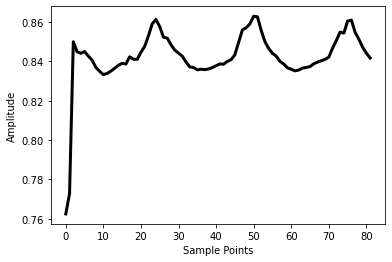

In [206]:
plt.plot(cA3,color='k',linewidth='3')
plt.xlabel("Sample Points")
plt.ylabel("Amplitude")

In [208]:
cA3

array([0.76244987, 0.77278106, 0.84997618, 0.84489287, 0.84413738,
       0.84503917, 0.8426983 , 0.84066746, 0.83696143, 0.83497065,
       0.83329606, 0.83385796, 0.83505217, 0.83649372, 0.83804778,
       0.83899225, 0.83868793, 0.84233048, 0.84113184, 0.84103001,
       0.84464632, 0.8476608 , 0.85306741, 0.85910758, 0.8613261 ,
       0.85769565, 0.85230584, 0.85183611, 0.84846268, 0.845765  ,
       0.84420325, 0.84264683, 0.83968397, 0.83715307, 0.83692815,
       0.83570925, 0.8360427 , 0.83581154, 0.83616814, 0.83686319,
       0.83782305, 0.83869367, 0.83858653, 0.8400076 , 0.84086999,
       0.84341228, 0.84976246, 0.85601435, 0.85713861, 0.85907234,
       0.86296299, 0.86268209, 0.85580357, 0.85003962, 0.84655948,
       0.84412714, 0.84266486, 0.84001565, 0.83866338, 0.83671636,
       0.83603075, 0.83519176, 0.83561797, 0.83658634, 0.83694382,
       0.83737076, 0.83878699, 0.83964755, 0.84035706, 0.84104387,
       0.84218065, 0.84676465, 0.85062846, 0.85490357, 0.85436

In [209]:
coeff=pywt.wavedec(dat5,"db2",level=4)

In [210]:
coeff[0]

array([0.76244987, 0.77278106, 0.84997618, 0.84489287, 0.84413738,
       0.84503917, 0.8426983 , 0.84066746, 0.83696143, 0.83497065,
       0.83329606, 0.83385796, 0.83505217, 0.83649372, 0.83804778,
       0.83899225, 0.83868793, 0.84233048, 0.84113184, 0.84103001,
       0.84464632, 0.8476608 , 0.85306741, 0.85910758, 0.8613261 ,
       0.85769565, 0.85230584, 0.85183611, 0.84846268, 0.845765  ,
       0.84420325, 0.84264683, 0.83968397, 0.83715307, 0.83692815,
       0.83570925, 0.8360427 , 0.83581154, 0.83616814, 0.83686319,
       0.83782305, 0.83869367, 0.83858653, 0.8400076 , 0.84086999,
       0.84341228, 0.84976246, 0.85601435, 0.85713861, 0.85907234,
       0.86296299, 0.86268209, 0.85580357, 0.85003962, 0.84655948,
       0.84412714, 0.84266486, 0.84001565, 0.83866338, 0.83671636,
       0.83603075, 0.83519176, 0.83561797, 0.83658634, 0.83694382,
       0.83737076, 0.83878699, 0.83964755, 0.84035706, 0.84104387,
       0.84218065, 0.84676465, 0.85062846, 0.85490357, 0.85436

Text(0, 0.5, 'Amplitude')

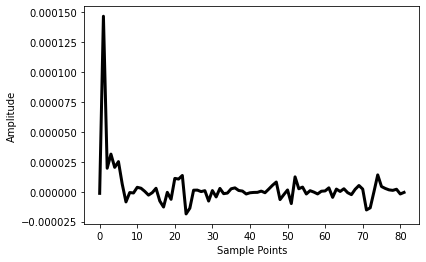

In [572]:
plt.plot(cD4,color='k',linewidth='3')
plt.xlabel("Sample Points")
plt.ylabel("Amplitude")

In [590]:
cA3,cD1,cD2,cD3,cD4=pywt.wavedec(dat5,"coif4",level=4)

Text(0, 0.5, 'Amplitude')

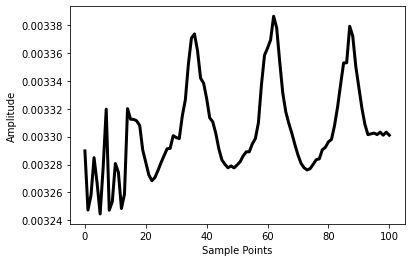

In [591]:
plt.plot(cA3,color='k',linewidth='3')
plt.xlabel("Sample Points")
plt.ylabel("Amplitude")

Text(0, 0.5, 'Amplitude')

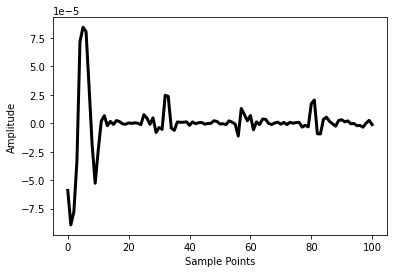

In [592]:
plt.plot(cD1,color='k',linewidth='3')
plt.xlabel("Sample Points")
plt.ylabel("Amplitude")

In [514]:
dat5=data5[25][150]/255

In [5]:
data0p=data[39]/255

In [6]:
t=np.arange(len(data0p[199]))

In [7]:
t.shape

(1280,)

In [8]:
len(data0p[0])

1280

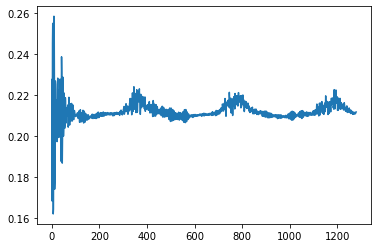

In [9]:
plt.plot(t,data0p[0])

In [10]:
cA1,cD1,cD2=pywt.wavedec(data,"haar",level=2)

In [11]:
type(cA1)

numpy.ndarray

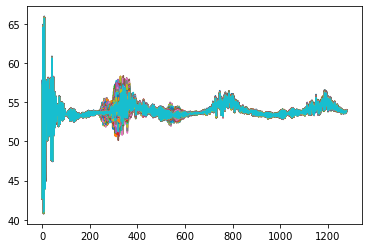

In [13]:
rec=1
savedecs=[]
#savedecfs=[]
for i in range(200):
    signal=data[rec,i,:]
    cA1,cD1,cD2=pywt.wavedec(data,"haar",level=2)
    vec=np.vstack((cA1,cD1))
    savedecs.append(vec)
    plt.plot(signal)

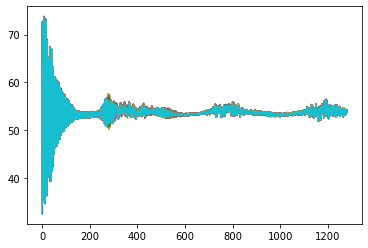

In [26]:
rec=24
savedecs=[]
#savedecfs=[]
for i in range(200):
    signal=data[rec,i,:]
    cA1,cD1,cD2=pywt.wavedec(data,"haar",level=2)
    vec=np.vstack((cA1,cD1))
    savedecs.append(vec)
    plt.plot(signal)

In [ ]:
get_entropy_probability(vec)

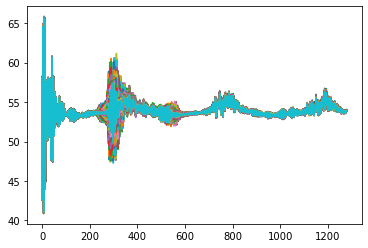

In [15]:
rec=39
savedecs=[]
#savedecfs=[]
for i in range(200):
    signal=data[rec,i,:]
    cA1,cD1,cD2=pywt.wavedec(data,"haar",level=2)
    vec=np.vstack((cA1,cD1))
    savedecs.append(vec)
    plt.plot(signal)

In [16]:
def get_entropy_probability(signal):
    ll=[]
    for j in range(len(np.histogram(signal))):
        l  = np.histogram(signal)[j]
        l2 = sc.entropy(l)
        ll.append(l2)
    return ll

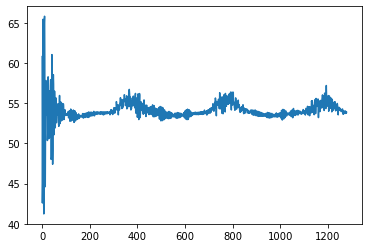

In [17]:
plt.plot(data[0,4,:])

In [38]:
cA1,cD1,CD2=pywt.wavedec(data[0,4,:],'haar',level=2)

In [18]:
vec=np.vstack((cA1,cD1))

In [19]:
def get_entropy_paper(signal):
    
    s=0 
    ge=[]
    for i in range(len(signal)):
        s = s + signal[i]**2 * np.log(signal[i]**2)
        ge.append(s)
    
    return ge


In [12]:
import pandas as pd

In [229]:
d9=data9[23][15][:];d5=data5[20][19][:];d1=data1[20][19][:];d3=data3[30][17][:];

Text(27.0, 0.5, 'Amplitude')

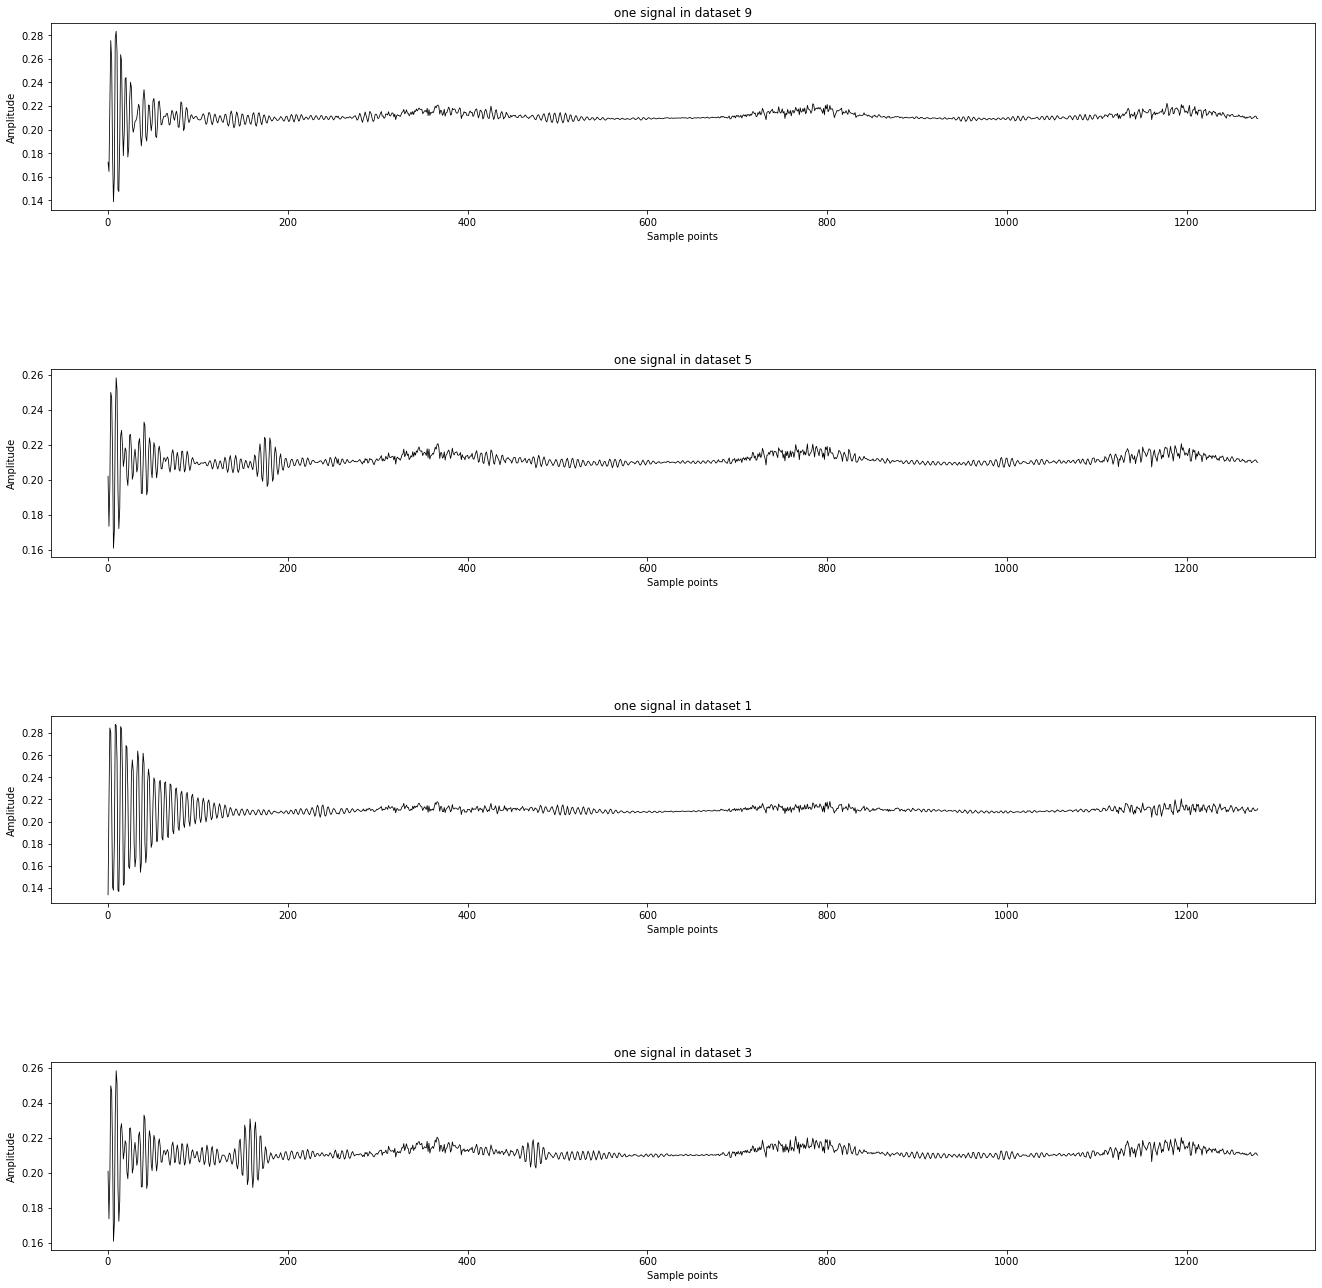

In [230]:
# Create four polar axes and access them through the returned array
fig, axs = plt.subplots(4, 1)
fig.tight_layout()
fig.set_figheight(20)
fig.set_figwidth(20)
axs[0].plot(d9/255,'k',linewidth=0.8)
axs[0].set_title('one signal in dataset 9')
axs[0].set_xlabel('Sample points')
axs[0].set_ylabel('Amplitude')
axs[1].plot(d5/255,'k',linewidth=0.8)
axs[1].set_title('one signal in dataset 5')
axs[1].set_xlabel('Sample points')
axs[1].set_ylabel('Amplitude')
axs[2].plot(d1/255,'k',linewidth=0.8)
axs[2].set_title('one signal in dataset 1')
axs[2].set_xlabel('Sample points')
axs[2].set_ylabel('Amplitude')
axs[3].plot(d3/255,'k',linewidth=0.8)
axs[3].set_title('one signal in dataset 3')
axs[3].set_xlabel('Sample points')
axs[3].set_ylabel('Amplitude')

In [201]:
cA4,cD4,cD3,cD2,cD1=pywt.wavedec(d1,'bior3.5',level=4)

Text(0.5, 0.98, 'biorthogonal Wavelet Transform Level 4 dataset 1')

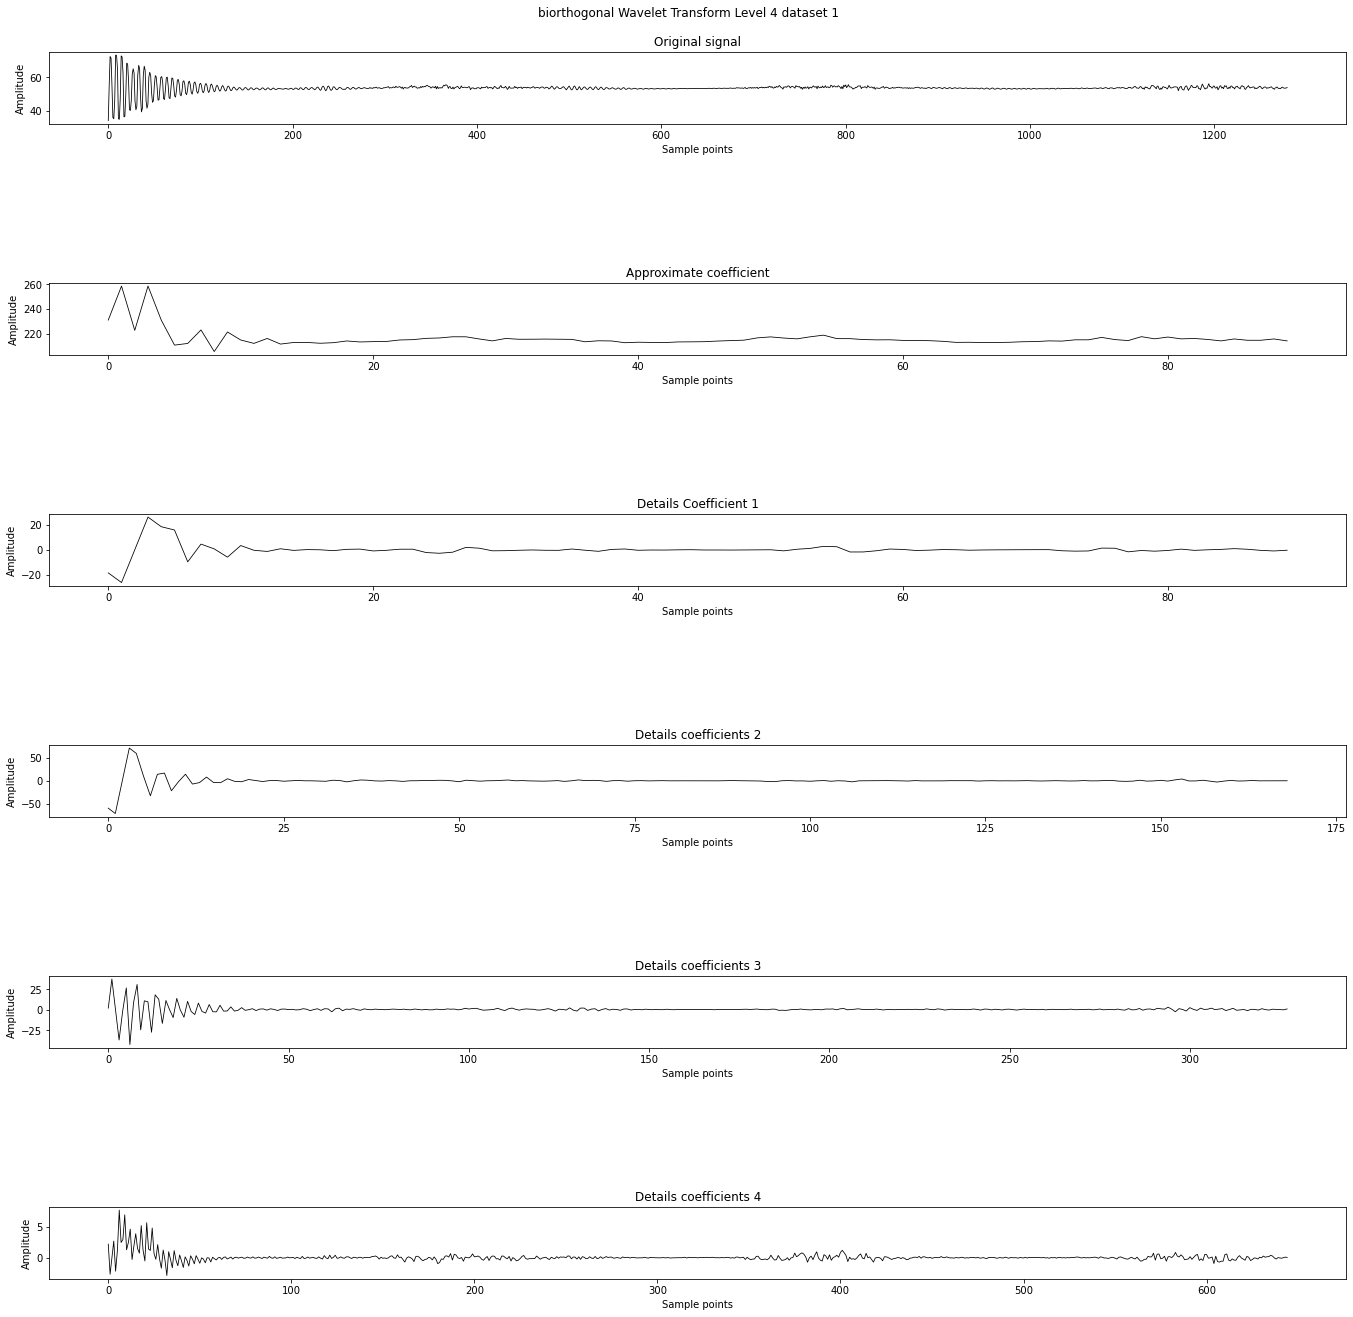

In [202]:
fig, axs = plt.subplots(6, 1)
fig.tight_layout()
fig.set_figheight(20)
fig.set_figwidth(20)
axs[0].plot(d1,'k',linewidth=0.8)
axs[0].set_title('Original signal')
axs[0].set_xlabel('Sample points')
axs[0].set_ylabel('Amplitude')
axs[1].plot(cA4,'k',linewidth=0.8)
axs[1].set_title('Approximate coefficient')
axs[1].set_xlabel('Sample points')
axs[1].set_ylabel('Amplitude')
axs[2].plot(cD4,'k',linewidth=0.8)
axs[2].set_title('Details Coefficient 1')
axs[2].set_xlabel('Sample points')
axs[2].set_ylabel('Amplitude')
axs[3].plot(cD3,'k',linewidth=0.8)
axs[3].set_title('Details coefficients 2')
axs[3].set_xlabel('Sample points')
axs[3].set_ylabel('Amplitude')
axs[4].plot(cD2,'k',linewidth=0.8)
axs[4].set_title('Details coefficients 3')
axs[4].set_xlabel('Sample points')
axs[4].set_ylabel('Amplitude')
axs[5].plot(cD1,'k',linewidth=0.8)
axs[5].set_title('Details coefficients 4')
axs[5].set_xlabel('Sample points')
axs[5].set_ylabel('Amplitude')
fig.suptitle('biorthogonal Wavelet Transform Level 4 dataset 1')

In [41]:
cA4,cD4,cD3,cD2,cD1=pywt.wavedec(d1,'haar',level=4)

NameError: name 'd1' is not defined

In [246]:
np.mean(cA4,)

214.76601111250005

C:\Users\Joel\anaconda3\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


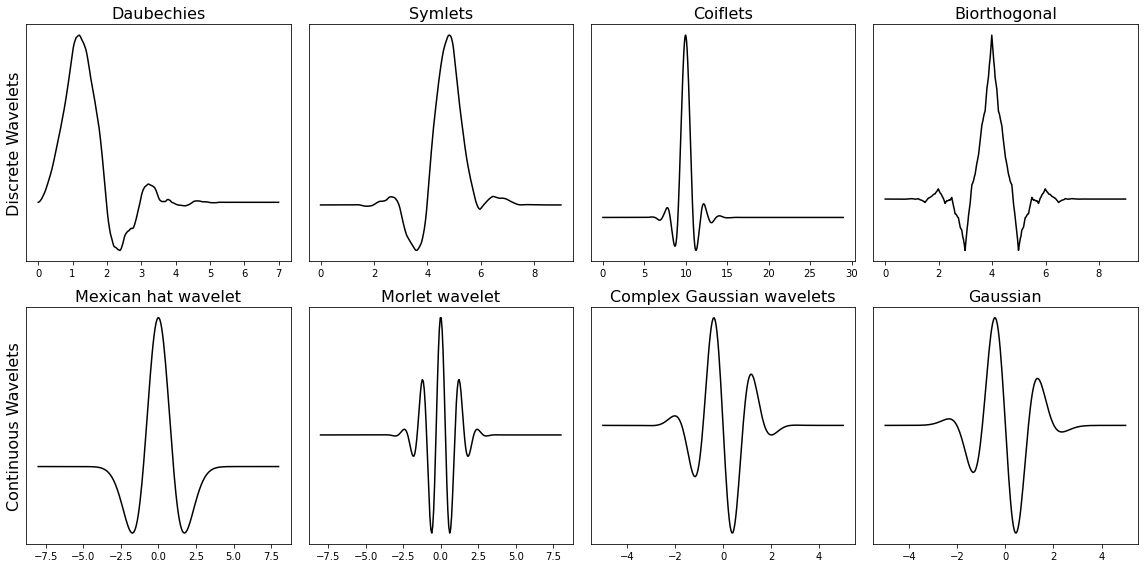

In [3]:
discrete_wavelets = ['db4', 'sym5', 'coif5', 'bior2.4']
continuous_wavelets = ['mexh', 'morl', 'cgau5', 'gaus5']

list_list_wavelets = [discrete_wavelets, continuous_wavelets]
list_funcs = [pywt.Wavelet, pywt.ContinuousWavelet]

fig, axarr = plt.subplots(nrows=2, ncols=4, figsize=(16,8))
for ii, list_wavelets in enumerate(list_list_wavelets):
    func = list_funcs[ii]
    row_no = ii
    for col_no, waveletname in enumerate(list_wavelets):
        wavelet = func(waveletname)
        family_name = wavelet.family_name
        biorthogonal = wavelet.biorthogonal
        orthogonal = wavelet.orthogonal
        symmetry = wavelet.symmetry
        if ii == 0:
            _ = wavelet.wavefun()
            wavelet_function = _[0]
            x_values = _[-1]
        else:
            wavelet_function, x_values = wavelet.wavefun()
        if col_no == 0 and ii == 0:
            axarr[row_no, col_no].set_ylabel("Discrete Wavelets", fontsize=16)
        if col_no == 0 and ii == 1:
            axarr[row_no, col_no].set_ylabel("Continuous Wavelets", fontsize=16)
        axarr[row_no, col_no].set_title("{}".format(family_name), fontsize=16)
        axarr[row_no, col_no].plot(x_values, wavelet_function,'k')
        axarr[row_no, col_no].set_yticks([])
        axarr[row_no, col_no].set_yticklabels([])

plt.tight_layout()
plt.show()

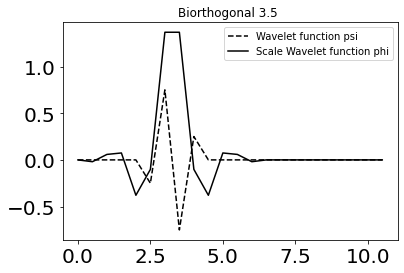

In [85]:
[phi, psi, phi_r, psi_r, x] = pywt.Wavelet('bior3.5').wavefun(level=1)
import pylab
pylab.plot(x, psi , ls='--' , color='k')
pylab.plot(x, phi , color='k')
plt.legend(['Wavelet function psi','Scale Wavelet function phi'])
plt.title("Biorthogonal 3.5 ")
pylab.show()

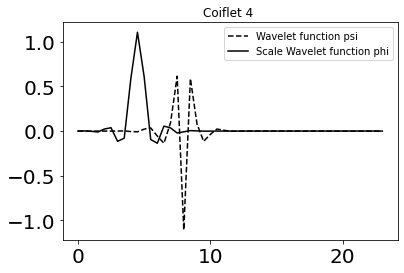

In [84]:
[phi, psi, x] = pywt.Wavelet('coif4').wavefun(level=1)
import pylab
pylab.plot(x, psi , ls='--' , color='k')
pylab.plot(x, phi , color='k')
plt.legend(['Wavelet function psi','Scale Wavelet function phi'])
plt.title("Coiflet 4 ")
pylab.show()